<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [3]:
# BEGIN SOLUTION
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
# END SOLUTION

<br><br>


I  will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. 



<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

So we are working on "Default of Credit Card Clients Dataset" which contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005 and our goal is to estimate whether a person will default (fail to pay) their credit card bills. This dataset has 30,000 examples and 24 features. The column we are trying to predict is "default.payment.next.month". 


Features of the dataset:
1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
3. SEX: Gender of the client
4. EDUCATION: Level of education
5. MARRIAGE: Marital status
6. AGE: Age in years
7. PAY_0 TO PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005)
8. BILL_AMT1 TO BILL_AMT6: Amount of bill statement (NT dollar). We tracked the bill statement records (from April to September, 2005)
9. PAY_AMT1 TO PAY_AMT6: Amount of previous payment (NT dollar). We tracked the payment records (from April to September, 2005)
10. default.payment.next.month: Default payment (1=yes, 0=no) {target}

In [8]:
df = pd.read_csv("data/UCI_Credit_Card.csv")
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [9]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df.shape

(21000, 25)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [10]:
print("n=%d, d=%d" % train_df.shape)
train_df.describe()

n=21000, d=25


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                   2100

In [13]:
print(
    "Fraction that default:\n",
    train_df["default.payment.next.month"].value_counts(normalize=True),
)

Fraction that default:
 default.payment.next.month
0    0.776762
1    0.223238
Name: proportion, dtype: float64


We have a class imbalance. Both classes seem important here and I am going to pick macro-average f1 score as our evaluation metric. 

In [16]:
from sklearn.metrics import f1_score, make_scorer, recall_score

custom_scorer = make_scorer(f1_score, average="macro")
scoring_metric = custom_scorer



np.max(train_df, axis=0)

ID                              30000.0
LIMIT_BAL                     1000000.0
SEX                                 2.0
EDUCATION                           6.0
MARRIAGE                            3.0
AGE                                79.0
PAY_0                               8.0
PAY_2                               8.0
PAY_3                               8.0
PAY_4                               8.0
PAY_5                               8.0
PAY_6                               8.0
BILL_AMT1                      964511.0
BILL_AMT2                      983931.0
BILL_AMT3                      855086.0
BILL_AMT4                      891586.0
BILL_AMT5                      927171.0
BILL_AMT6                      961664.0
PAY_AMT1                       873552.0
PAY_AMT2                      1227082.0
PAY_AMT3                       896040.0
PAY_AMT4                       621000.0
PAY_AMT5                       426529.0
PAY_AMT6                       528666.0
default.payment.next.month          1.0


In [17]:
np.min(train_df, axis=0)

ID                                 1.0
LIMIT_BAL                      10000.0
SEX                                1.0
EDUCATION                          0.0
MARRIAGE                           0.0
AGE                               21.0
PAY_0                             -2.0
PAY_2                             -2.0
PAY_3                             -2.0
PAY_4                             -2.0
PAY_5                             -2.0
PAY_6                             -2.0
BILL_AMT1                     -15308.0
BILL_AMT2                     -67526.0
BILL_AMT3                    -157264.0
BILL_AMT4                     -50616.0
BILL_AMT5                     -61372.0
BILL_AMT6                    -339603.0
PAY_AMT1                           0.0
PAY_AMT2                           0.0
PAY_AMT3                           0.0
PAY_AMT4                           0.0
PAY_AMT5                           0.0
PAY_AMT6                           0.0
default.payment.next.month         0.0
dtype: float64

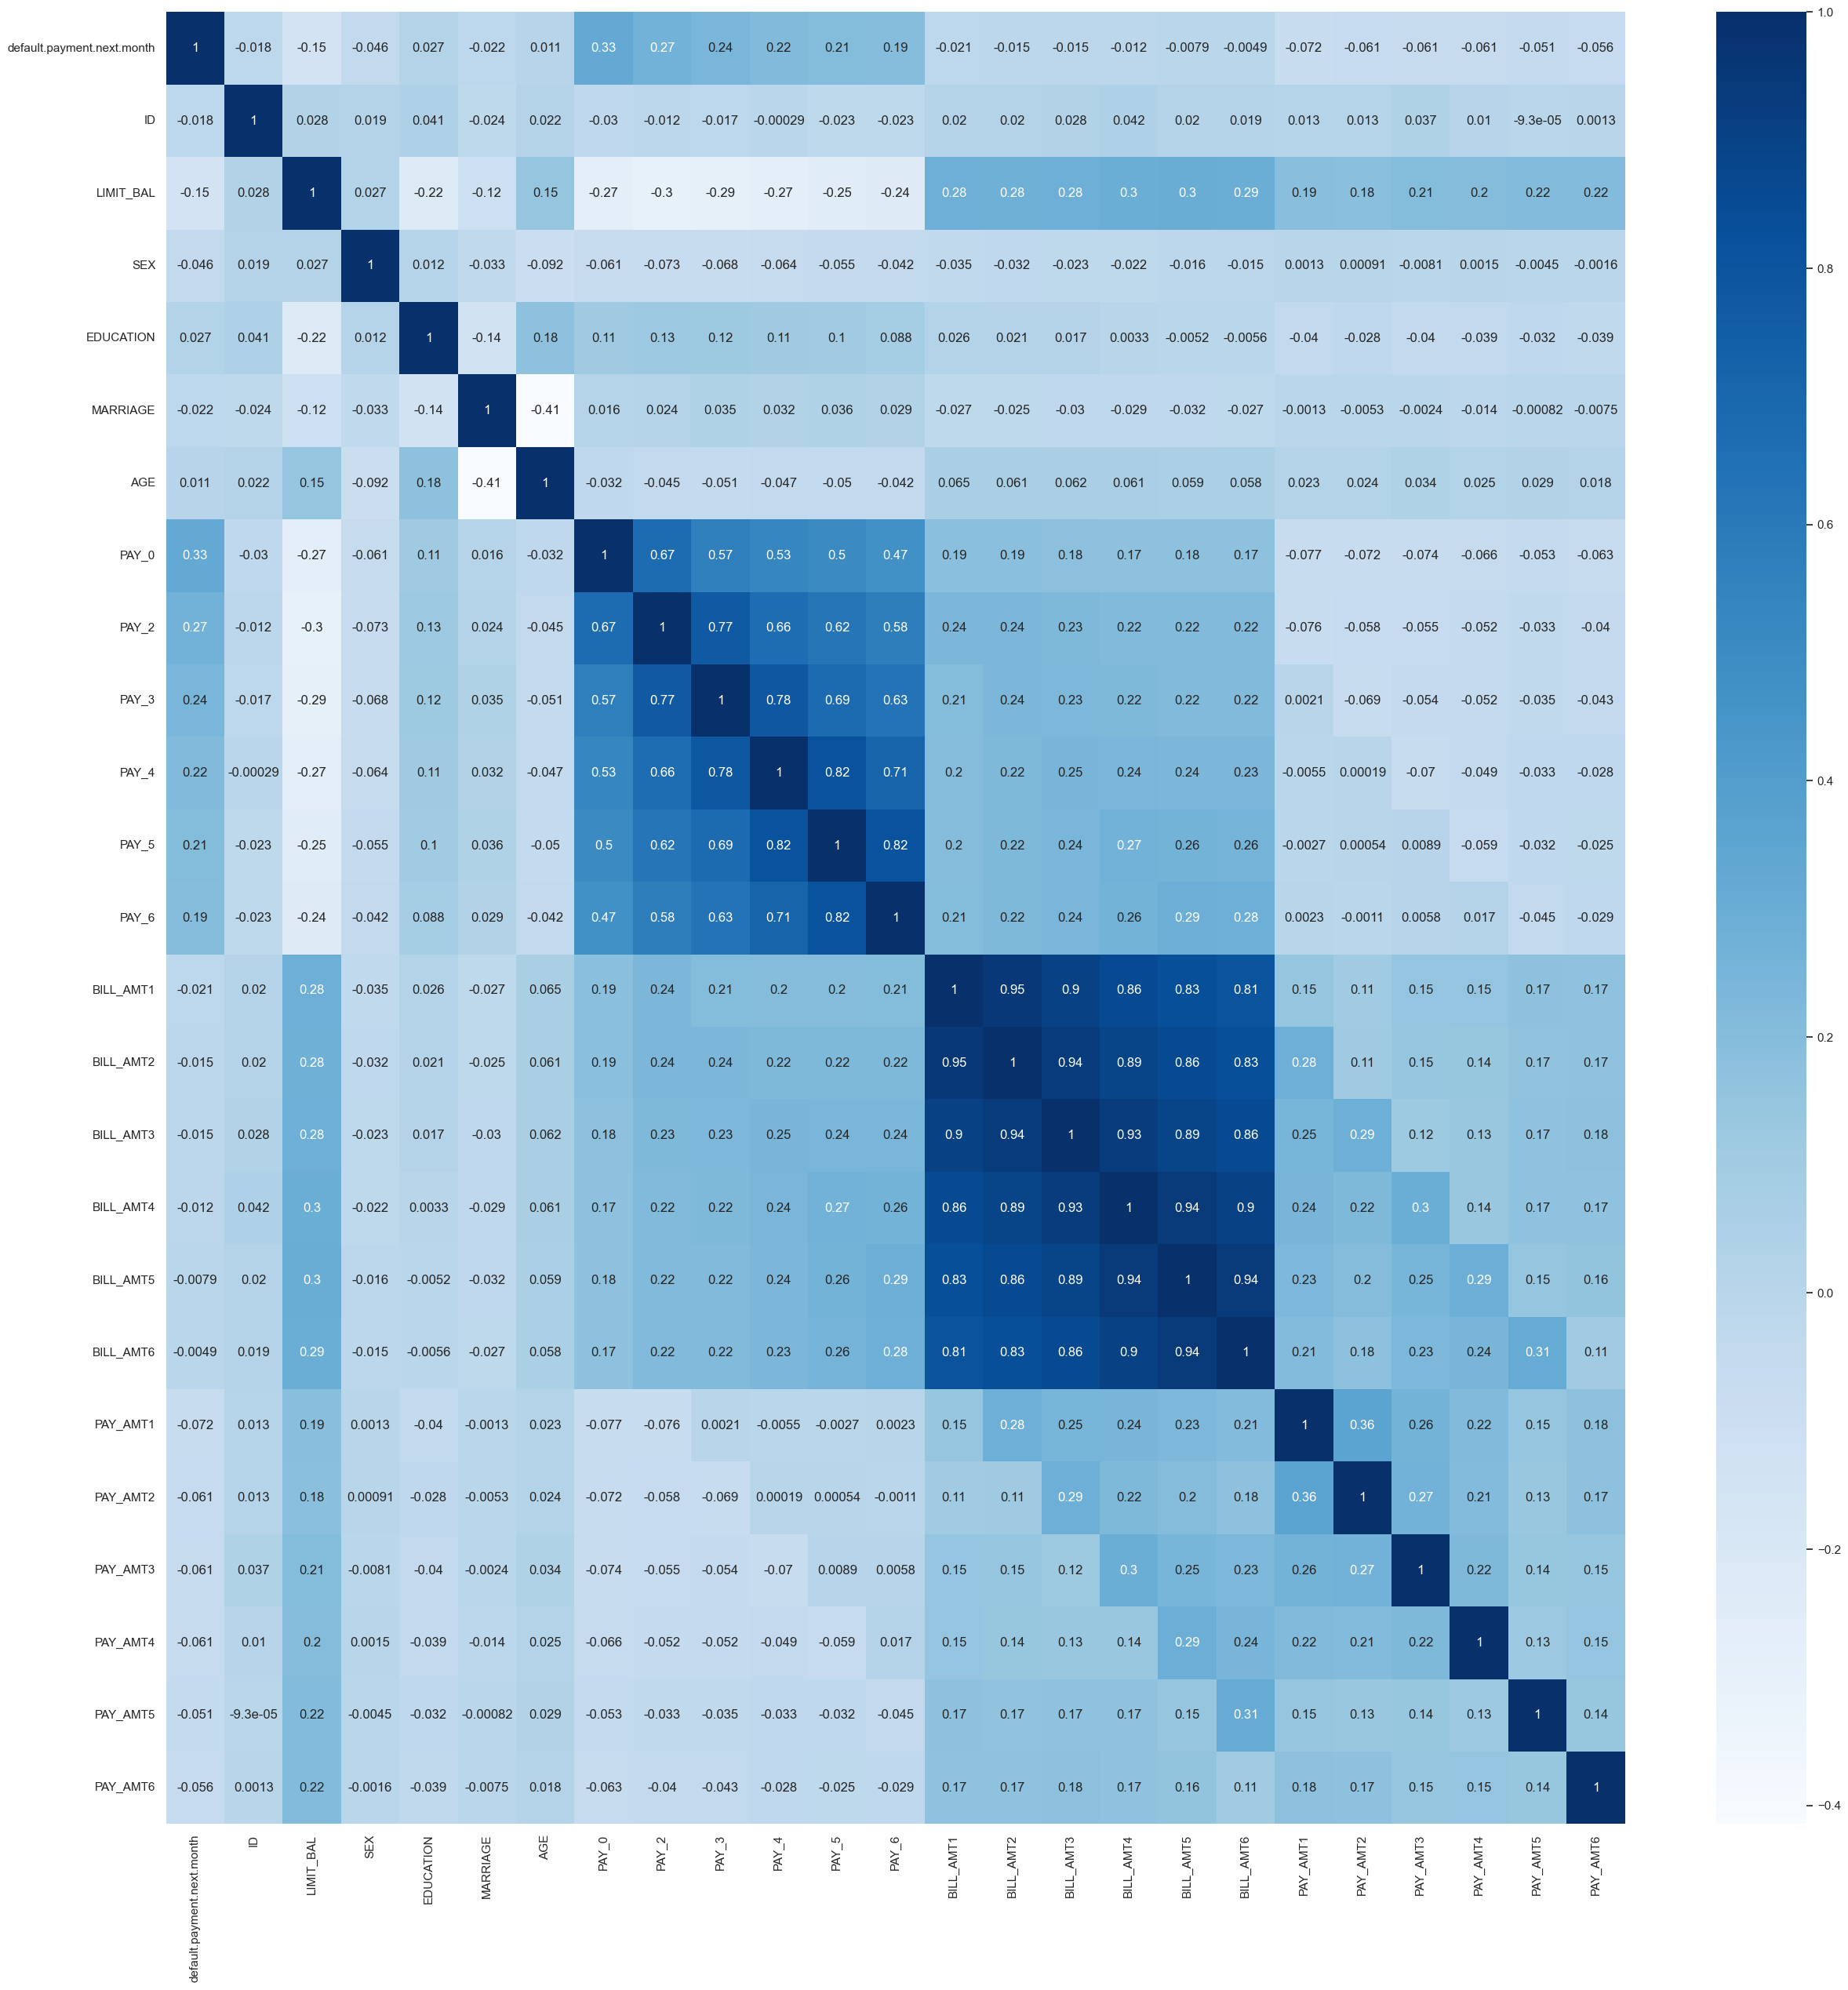

In [19]:
import seaborn as sns

X_train, y_train = (
    train_df.drop(columns=["default.payment.next.month"]),
    train_df["default.payment.next.month"],
)
X_test, y_test = (
    test_df.drop(columns=["default.payment.next.month"]),
    test_df["default.payment.next.month"],
)



cor = pd.concat((y_train, X_train), axis=1).iloc[:, :30].corr()
plt.figure(figsize=(30, 30))
sns.set(font_scale=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

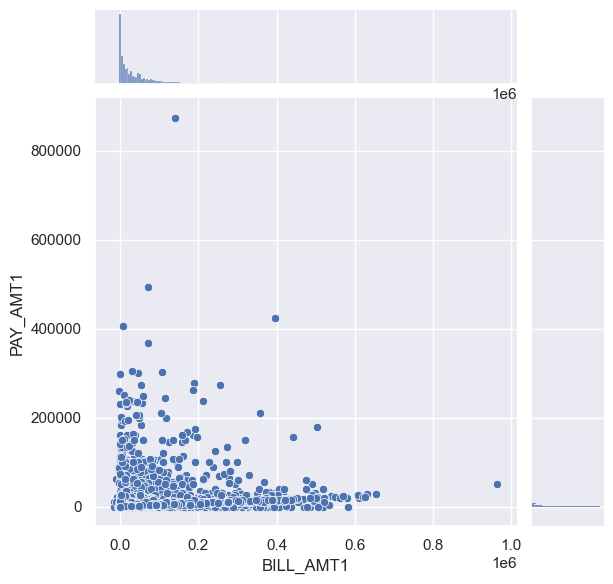

In [20]:
sns.jointplot(x="BILL_AMT1", y="PAY_AMT1", data=train_df);

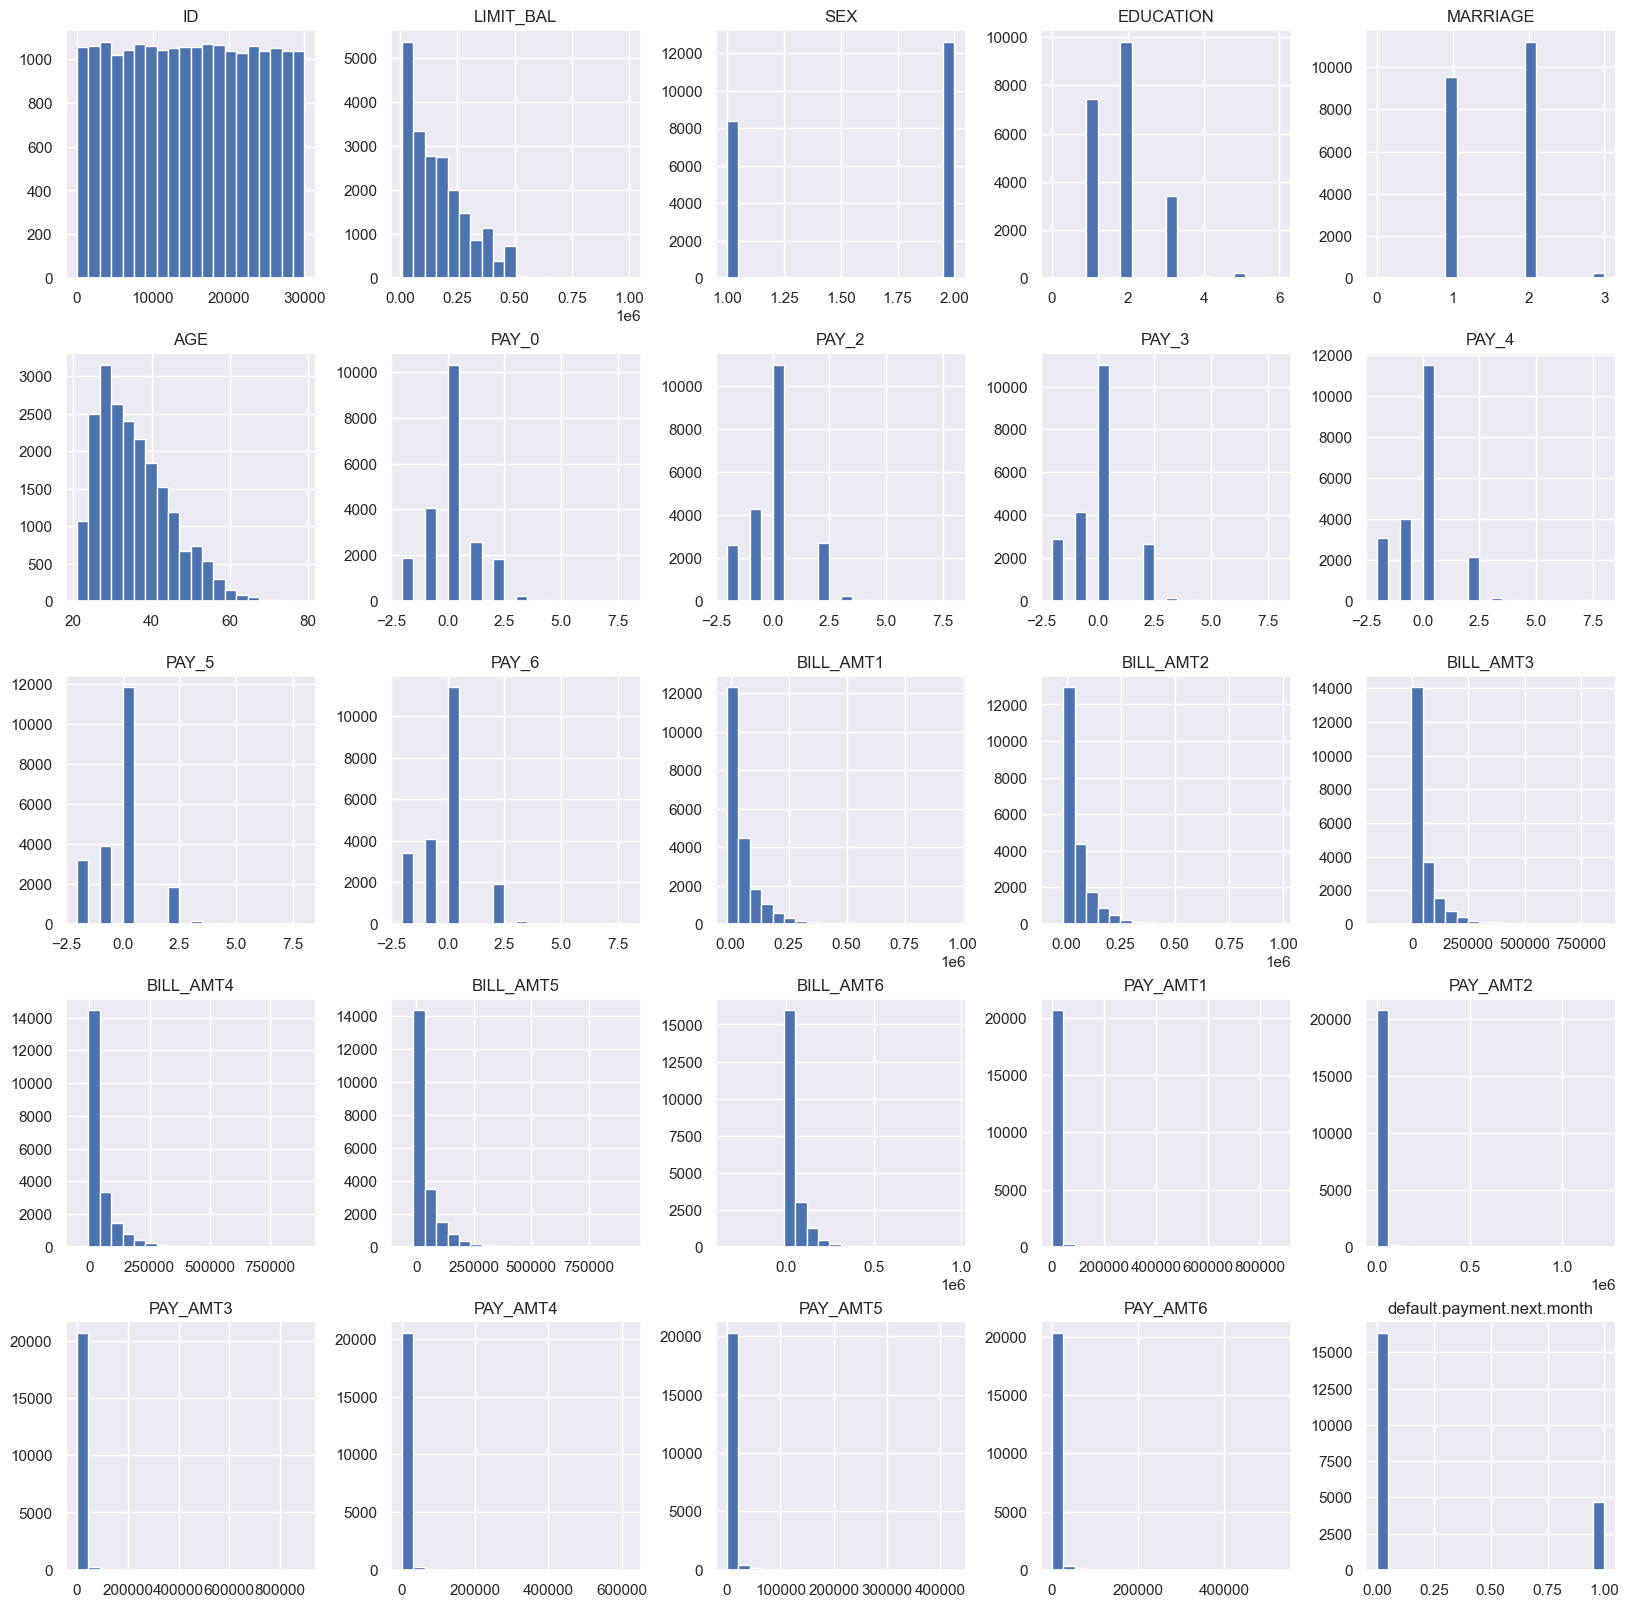

In [21]:
train_df.hist(figsize=(20, 20), bins=20);

Some initial observations:
    
- We have very few features.
- We have class imbalance and we need to deal with it. We have chosen macro average f1 as our target metric so that both classes get equal weight. 
- The feature ranges are very different, so we'll need to standardize. 
- We have a number of collinear features.
- We have quite a few outliers. 
- The data is messy / doesn't always correspond to the data description. 
  - What are education levels 5 and 6?
  - What does it mean for PAY_* to be -2? Or 0?

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [6]:
def engineer_features(df):
    """
    Create new features from the existing credit card dataset
    
    Parameters:
    df (pandas.DataFrame): Input dataframe
    
    Returns:
    pandas.DataFrame: Dataframe with new engineered features
    """
    # Create a copy to avoid modifying the original
    df_new = df.copy()

    # 1. Payment Behavior Features
    # Average payment amount ratio (payment amount / bill amount)
    for i in range(1, 7):
        df_new[f'PAYMENT_RATIO_{i}'] = df_new[f'PAY_AMT{i}'] / df_new[f'BILL_AMT{i}'].replace(0, 1)

    # Average payment ratio
    df_new['AVG_PAYMENT_RATIO'] = df_new[[f'PAYMENT_RATIO_{i}' for i in range(1, 7)]].mean(axis=1)

    # 2. Credit Utilization Features
    # Credit utilization for each month
    for i in range(1, 7):
        df_new[f'CREDIT_USAGE_{i}'] = df_new[f'BILL_AMT{i}'] / df_new['LIMIT_BAL']

    # Average credit utilization
    df_new['AVG_CREDIT_USAGE'] = df_new[[f'CREDIT_USAGE_{i}' for i in range(1, 7)]].mean(axis=1)

    # 3. Payment Delay Features
    # Count of months with delay
    df_new['MONTHS_WITH_DELAY'] = (df_new[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] > 0).sum(axis=1)

    # Maximum delay
    df_new['MAX_PAYMENT_DELAY'] = df_new[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].max(axis=1)

    # 4. Payment Trend Features
    # Payment amount trend (increasing or decreasing)
    payment_cols = [f'PAY_AMT{i}' for i in range(1, 7)]
    df_new['PAYMENT_TREND'] = [1 if np.polyfit(range(6), amounts, 1)[0] > 0 else 0
                               for amounts in df_new[payment_cols].values]

    # 5. Bill Amount Features
    # Bill amount volatility
    bill_cols = [f'BILL_AMT{i}' for i in range(1, 7)]
    df_new['BILL_VOLATILITY'] = df_new[bill_cols].std(axis=1) / df_new[bill_cols].mean(axis=1).replace(0, 1)

    # 6. Risk Indicators
    # High-risk flag (combination of multiple risk factors)
    df_new['HIGH_RISK_FLAG'] = ((df_new['MONTHS_WITH_DELAY'] >= 3) &
                                (df_new['AVG_CREDIT_USAGE'] > 0.8) &
                                (df_new['AVG_PAYMENT_RATIO'] < 0.2)).astype(int)

    # 7. Demographic Risk Features
    # Age groups
    df_new['AGE_GROUP'] = pd.qcut(df_new['AGE'], q=5, labels=['Very Young', 'Young', 'Middle', 'Senior', 'Elder'])

    # Education-Marriage interaction
    df_new['EDU_MARRIAGE_GROUP'] = df_new['EDUCATION'].astype(str) + '_' + df_new['MARRIAGE'].astype(str)

    return df_new

# Apply feature engineering to both train and test sets
train_engineered = engineer_features(train_data)
test_engineered = engineer_features(test_data)

# Display new features info
print("New features created:")
new_features = [col for col in train_engineered.columns if col not in train_data.columns]
print("\n".join(f"- {feature}" for feature in new_features))

# Show sample of new features
print("\nSample of engineered features:")
print(train_engineered[new_features].describe())

New features created:
- PAYMENT_RATIO_1
- PAYMENT_RATIO_2
- PAYMENT_RATIO_3
- PAYMENT_RATIO_4
- PAYMENT_RATIO_5
- PAYMENT_RATIO_6
- AVG_PAYMENT_RATIO
- CREDIT_USAGE_1
- CREDIT_USAGE_2
- CREDIT_USAGE_3
- CREDIT_USAGE_4
- CREDIT_USAGE_5
- CREDIT_USAGE_6
- AVG_CREDIT_USAGE
- MONTHS_WITH_DELAY
- MAX_PAYMENT_DELAY
- PAYMENT_TREND
- BILL_VOLATILITY
- HIGH_RISK_FLAG
- AGE_GROUP
- EDU_MARRIAGE_GROUP

Sample of engineered features:
       PAYMENT_RATIO_1  PAYMENT_RATIO_2  PAYMENT_RATIO_3  PAYMENT_RATIO_4  \
count     21000.000000     21000.000000     21000.000000     21000.000000   
mean        102.505541       177.277045       189.909765       171.921551   
std        3087.420631      4281.302077      4635.382474      3463.373492   
min       -8706.600000    -10259.500000    -82150.000000    -17266.666667   
25%           0.034353         0.030775         0.019988         0.012596   
50%           0.055620         0.053384         0.043663         0.039035   
75%           0.264917         0.2

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [26]:
# BEGIN SOLUTION
# Let's identify numeric and categorical features
drop_features = ["ID"]
numeric_features = [
    "LIMIT_BAL",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
    "BILL_AMT1",
    "BILL_AMT2",
    "BILL_AMT3",
    "BILL_AMT4",
    "BILL_AMT5",
    "BILL_AMT6",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6",
    "AGE",
]
binary_features = ["SEX"]
categorical_features = ["EDUCATION", "MARRIAGE"]
target = "default.payment.next.month"



preprocessor = make_column_transformer(
    ("drop", drop_features),
    (StandardScaler(), numeric_features),
    (OneHotEncoder(drop="if_binary"), binary_features),
    (OneHotEncoder(handle_unknown="ignore"), categorical_features),
)


preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()


feature_names = (
        numeric_features
        + binary_features
        + preprocessor.named_transformers_["onehotencoder-2"].get_feature_names_out().tolist()
)


def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

results = {}


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [27]:
# BEGIN SOLUTION
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
# END SOLUTION

In [28]:

dummy = DummyClassifier(strategy="stratified")
results["dummy"] = mean_std_cross_val_scores(
    dummy, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results)


,dummy
fit_time,0.002 (+/- 0.001)
score_time,0.002 (+/- 0.001)
test_score,0.499 (+/- 0.005)
train_score,0.500 (+/- 0.001)


In [29]:
cross_val_score(dummy, X_train, y_train)



array([0.65785714, 0.64738095, 0.6552381 , 0.65880952, 0.64928571])

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [30]:
pipe_lr = make_pipeline(
    preprocessor, LogisticRegression(max_iter=1000, class_weight="balanced")
)
results["logreg"] = mean_std_cross_val_scores(
    pipe_lr, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results)


,dummy,logreg
fit_time,0.002 (+/- 0.001),0.101 (+/- 0.016)
score_time,0.002 (+/- 0.001),0.005 (+/- 0.002)
test_score,0.499 (+/- 0.005),0.625 (+/- 0.006)
train_score,0.500 (+/- 0.001),0.627 (+/- 0.003)


In [31]:
from scipy.stats import lognorm, loguniform, randint

param_grid = {"logisticregression__C": loguniform(1e-3, 1e3)}

random_search = RandomizedSearchCV(
    pipe_lr,
    param_grid,
    n_iter=50,
    verbose=1,
    n_jobs=1,
    scoring=scoring_metric,
    random_state=123,
    return_train_score=True,
)

random_search.fit(X_train, y_train);



Fitting 5 folds for each of 50 candidates, totalling 250 fits


<!-- END QUESTION -->

<br><br>

In [32]:
best_logreg = random_search.best_estimator_
results["logreg (tuned)"] = mean_std_cross_val_scores(
    best_logreg, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
dummy,0.002 (+/- 0.001),0.002 (+/- 0.001),0.499 (+/- 0.005),0.500 (+/- 0.001)
logreg,0.101 (+/- 0.016),0.005 (+/- 0.002),0.625 (+/- 0.006),0.627 (+/- 0.003)
logreg (tuned),0.033 (+/- 0.003),0.004 (+/- 0.001),0.629 (+/- 0.006),0.630 (+/- 0.003)


<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

In [34]:
%pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [36]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

ratio = np.bincount(y_train)[0] / np.bincount(y_train)[1]
ratio
models = {
    "RBF SVM": SVC(),
    "random forest": RandomForestClassifier(class_weight="balanced", random_state=2),
    "xgboost": XGBClassifier(scale_pos_weight=ratio, random_state=2),
    "lgbm": LGBMClassifier(scale_pos_weight=ratio, random_state=2),
}

for name, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    results[name] = mean_std_cross_val_scores(
        pipe, X_train, y_train, return_train_score=True, scoring=scoring_metric
    )

pd.DataFrame(results).T

[LightGBM] [Info] Number of positive: 3751, number of negative: 13049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3276
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223274 -> initscore=-1.246689
[LightGBM] [Info] Start training from score -1.246689
[LightGBM] [Info] Number of positive: 3751, number of negative: 13049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3278
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 31
[LightGBM] [Info] [b

,fit_time,score_time,test_score,train_score
dummy,0.002 (+/- 0.001),0.002 (+/- 0.001),0.499 (+/- 0.005),0.500 (+/- 0.001)
logreg,0.101 (+/- 0.016),0.005 (+/- 0.002),0.625 (+/- 0.006),0.627 (+/- 0.003)
logreg (tuned),0.033 (+/- 0.003),0.004 (+/- 0.001),0.629 (+/- 0.006),0.630 (+/- 0.003)
RBF SVM,3.830 (+/- 0.082),1.027 (+/- 0.007),0.675 (+/- 0.008),0.686 (+/- 0.002)
random forest,2.767 (+/- 0.278),0.051 (+/- 0.002),0.668 (+/- 0.004),0.999 (+/- 0.000)
xgboost,0.183 (+/- 0.005),0.006 (+/- 0.000),0.683 (+/- 0.007),0.874 (+/- 0.008)
lgbm,0.431 (+/- 0.013),0.009 (+/- 0.001),0.691 (+/- 0.011),0.772 (+/- 0.004)


<!-- END QUESTION -->

<br><br>

In [37]:
del models["RBF SVM"]

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [40]:
from sklearn.feature_selection import RFE, RFECV, SelectFromModel

for name, model in models.items():
    pipe = make_pipeline(
        preprocessor,
        SelectFromModel(
            LogisticRegression(solver="liblinear", penalty="l1", max_iter=1000)
        ),
        model,
    )
    results[name + "+ feat_sel"] = mean_std_cross_val_scores(
        pipe, X_train, y_train, return_train_score=True, scoring=scoring_metric
    )

[LightGBM] [Info] Number of positive: 3751, number of negative: 13049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3015
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223274 -> initscore=-1.246689
[LightGBM] [Info] Start training from score -1.246689
[LightGBM] [Info] Number of positive: 3751, number of negative: 13049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3274
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 29
[LightGBM] [Info] [b

In [41]:
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
dummy,0.002 (+/- 0.001),0.002 (+/- 0.001),0.499 (+/- 0.005),0.500 (+/- 0.001)
logreg,0.101 (+/- 0.016),0.005 (+/- 0.002),0.625 (+/- 0.006),0.627 (+/- 0.003)
logreg (tuned),0.033 (+/- 0.003),0.004 (+/- 0.001),0.629 (+/- 0.006),0.630 (+/- 0.003)
RBF SVM,3.830 (+/- 0.082),1.027 (+/- 0.007),0.675 (+/- 0.008),0.686 (+/- 0.002)
random forest,2.767 (+/- 0.278),0.051 (+/- 0.002),0.668 (+/- 0.004),0.999 (+/- 0.000)
xgboost,0.183 (+/- 0.005),0.006 (+/- 0.000),0.683 (+/- 0.007),0.874 (+/- 0.008)
lgbm,0.431 (+/- 0.013),0.009 (+/- 0.001),0.691 (+/- 0.011),0.772 (+/- 0.004)
random forest+ feat_sel,3.285 (+/- 0.181),0.051 (+/- 0.002),0.670 (+/- 0.007),0.999 (+/- 0.000)
xgboost+ feat_sel,0.917 (+/- 0.377),0.006 (+/- 0.000),0.684 (+/- 0.011),0.872 (+/- 0.005)
lgbm+ feat_sel,0.804 (+/- 0.347),0.009 (+/- 0.001),0.690 (+/- 0.008),0.772 (+/- 0.003)


In [42]:
pipe_random_forest = make_pipeline(
    preprocessor,
    SelectFromModel(
        LogisticRegression(solver="liblinear", penalty="l1", max_iter=1000)
    ),
    models["random forest"],
)

pipe_random_forest.fit(X_train, y_train)
print(
    "Number of features selected: ",
    pipe_random_forest.named_steps["randomforestclassifier"].n_features_in_,
)

Number of features selected:  29


<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [44]:
param_grid_rf = {
    "randomforestclassifier__n_estimators": randint(low=10, high=100),
    "randomforestclassifier__max_depth": randint(low=2, high=20),
}

pipe_random_forest = make_pipeline(preprocessor, models["random forest"])


In [46]:
random_search_rf = RandomizedSearchCV(
    pipe_random_forest,
    param_grid_rf,
    n_iter=50,
    verbose=1,
    n_jobs=1,
    scoring=scoring_metric,
    random_state=123,
    return_train_score=True,
)

random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('drop',
                                                                               'drop',
                                                                               ['ID']),
                                                                              ('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_A...
                   param_distributions={'randomforestclassifier__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14252cdd0>,
                                        'randomforestclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x142c0fe00>},
                   random_state=123, return_train_score=True,
                   scoring=make_scorer(f1_score, response_method='predict', average=macro),
                   verbose=1)

In [47]:
print("Best hyperparameter values: ", random_search_rf.best_params_)
print("Best score: %0.3f" % (random_search_rf.best_score_))

pd.DataFrame(random_search_rf.cv_results_)[
    [
        "mean_train_score",
        "mean_test_score",
        "param_randomforestclassifier__n_estimators",
        "param_randomforestclassifier__max_depth",
        "mean_fit_time",
        "rank_test_score",
        "std_test_score",
    ]
].set_index("rank_test_score").sort_index()[:10]


Best hyperparameter values:  {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 35}
Best score: 0.706


,mean_train_score,mean_test_score,param_randomforestclassifier__n_estimators,param_randomforestclassifier__max_depth,mean_fit_time,std_test_score
rank_test_score,,,,,,
1,0.769096,0.706252,35,10,0.625473,0.009908
2,0.790790,0.704994,62,11,1.155590,0.010242
3,0.790054,0.704646,42,11,0.877421,0.011779
4,0.815172,0.704345,79,12,1.544706,0.009381
5,0.706165,0.703473,86,4,0.715533,0.009062
6,0.707018,0.703436,27,4,0.259208,0.008124
7,0.705863,0.703001,68,4,0.563205,0.009126
8,0.814498,0.702866,67,12,1.373730,0.010140
9,0.738131,0.702844,95,8,1.375689,0.008515


In [48]:
best_rf_model = random_search_rf.best_estimator_
results["random forest (tuned)"] = mean_std_cross_val_scores(
    best_rf_model, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
dummy,0.002 (+/- 0.001),0.002 (+/- 0.001),0.499 (+/- 0.005),0.500 (+/- 0.001)
logreg,0.101 (+/- 0.016),0.005 (+/- 0.002),0.625 (+/- 0.006),0.627 (+/- 0.003)
logreg (tuned),0.033 (+/- 0.003),0.004 (+/- 0.001),0.629 (+/- 0.006),0.630 (+/- 0.003)
RBF SVM,3.830 (+/- 0.082),1.027 (+/- 0.007),0.675 (+/- 0.008),0.686 (+/- 0.002)
random forest,2.767 (+/- 0.278),0.051 (+/- 0.002),0.668 (+/- 0.004),0.999 (+/- 0.000)
xgboost,0.183 (+/- 0.005),0.006 (+/- 0.000),0.683 (+/- 0.007),0.874 (+/- 0.008)
lgbm,0.431 (+/- 0.013),0.009 (+/- 0.001),0.691 (+/- 0.011),0.772 (+/- 0.004)
random forest+ feat_sel,3.285 (+/- 0.181),0.051 (+/- 0.002),0.670 (+/- 0.007),0.999 (+/- 0.000)
xgboost+ feat_sel,0.917 (+/- 0.377),0.006 (+/- 0.000),0.684 (+/- 0.011),0.872 (+/- 0.005)
lgbm+ feat_sel,0.804 (+/- 0.347),0.009 (+/- 0.001),0.690 (+/- 0.008),0.772 (+/- 0.003)


#### LGBM hyperparameter optimization 

In [51]:
param_grid_lgbm = {
    "lgbmclassifier__n_estimators": randint(10, 100),
    # "lgbmclassifier__max_depth": randint(low=2, high=20),
    "lgbmclassifier__learning_rate": [0.01, 0.1],
    "lgbmclassifier__subsample": [0.5, 0.75, 1],
}

pipe_lgbm = make_pipeline(
    preprocessor,
    models["lgbm"],
)


random_search_lgbm = RandomizedSearchCV(
    pipe_lgbm,
    param_grid_lgbm,
    n_iter=50,
    verbose=1,
    n_jobs=1,
    scoring=scoring_metric,
    random_state=123,
    return_train_score=True,
)

random_search_lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 3751, number of negative: 13049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3276
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223274 -> initscore=-1.246689
[LightGBM] [Info] Start training from score -1.246689
[LightGBM] [Info] Number of positive: 3751, number of negative: 13049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3278
[LightGBM] [Info] Number of data points in the trai

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('drop',
                                                                               'drop',
                                                                               ['ID']),
                                                                              ('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_A...
                   n_iter=50, n_jobs=1,
                   param_distributions={'lgbmclassifier__learning_rate': [0.01,
                                                                          0.1],
                                        'lgbmclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x125991f10>,
                                        'lgbmclassifier__subsample': [0.5, 0.75,
                                                                      1]},
                   random_state=123, return_train_score=True,
                   scoring=make_scorer(f1_score, response_method='predict', average=macro),
                   verbose=1)

In [52]:
print("Best hyperparameter values: ", random_search_lgbm.best_params_)
print("Best score: %0.3f" % (random_search_lgbm.best_score_))

pd.DataFrame(random_search_lgbm.cv_results_)[
    [
        "mean_train_score",
        "mean_test_score",
        "param_lgbmclassifier__n_estimators",
        "param_lgbmclassifier__learning_rate",
        "param_lgbmclassifier__subsample",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index()[:10]

Best hyperparameter values:  {'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__n_estimators': 13, 'lgbmclassifier__subsample': 0.5}
Best score: 0.707


,mean_train_score,mean_test_score,param_lgbmclassifier__n_estimators,param_lgbmclassifier__learning_rate,param_lgbmclassifier__subsample,mean_fit_time
rank_test_score,,,,,,
1,0.718904,0.706997,13,0.10,0.5,0.077422
2,0.719469,0.706529,11,0.10,0.5,0.072143
2,0.719469,0.706529,11,0.10,1.0,0.071218
4,0.721328,0.704935,17,0.10,1.0,0.096247
5,0.710473,0.701874,94,0.01,0.5,0.442614
6,0.722566,0.698224,22,0.10,1.0,0.119528
7,0.723291,0.697680,24,0.10,1.0,0.129236
8,0.702752,0.695554,86,0.01,0.5,0.403355
9,0.728293,0.691679,35,0.10,1.0,0.178307


In [53]:
best_lgbm_model = random_search_lgbm.best_estimator_
results["lgbm (tuned)"] = mean_std_cross_val_scores(
    best_lgbm_model, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results).T

[LightGBM] [Info] Number of positive: 3751, number of negative: 13049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3276
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223274 -> initscore=-1.246689
[LightGBM] [Info] Start training from score -1.246689
[LightGBM] [Info] Number of positive: 3751, number of negative: 13049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3278
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 31
[LightGBM] [Info] [b

,fit_time,score_time,test_score,train_score
dummy,0.002 (+/- 0.001),0.002 (+/- 0.001),0.499 (+/- 0.005),0.500 (+/- 0.001)
logreg,0.101 (+/- 0.016),0.005 (+/- 0.002),0.625 (+/- 0.006),0.627 (+/- 0.003)
logreg (tuned),0.033 (+/- 0.003),0.004 (+/- 0.001),0.629 (+/- 0.006),0.630 (+/- 0.003)
RBF SVM,3.830 (+/- 0.082),1.027 (+/- 0.007),0.675 (+/- 0.008),0.686 (+/- 0.002)
random forest,2.767 (+/- 0.278),0.051 (+/- 0.002),0.668 (+/- 0.004),0.999 (+/- 0.000)
xgboost,0.183 (+/- 0.005),0.006 (+/- 0.000),0.683 (+/- 0.007),0.874 (+/- 0.008)
lgbm,0.431 (+/- 0.013),0.009 (+/- 0.001),0.691 (+/- 0.011),0.772 (+/- 0.004)
random forest+ feat_sel,3.285 (+/- 0.181),0.051 (+/- 0.002),0.670 (+/- 0.007),0.999 (+/- 0.000)
xgboost+ feat_sel,0.917 (+/- 0.377),0.006 (+/- 0.000),0.684 (+/- 0.011),0.872 (+/- 0.005)
lgbm+ feat_sel,0.804 (+/- 0.347),0.009 (+/- 0.001),0.690 (+/- 0.008),0.772 (+/- 0.003)


Hyperparameter optimization seems to help with random forests as well as LightGBM. The scores for both models seem very similar. But we pick LightGBM because
- it seems to be less overfitting 
- it's much faster
- the standard deviation is smaller compared to random forest.

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [54]:
import shap

preprocessor.fit(X_train, y_train)

X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=feature_names,
    index=X_train.index,
)

X_train_enc.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
16395,1.168355,0.013770,0.114774,0.143483,0.192754,0.232531,0.257059,-0.300665,-0.293394,-0.265310,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21448,2.090017,-0.878738,-0.722412,-0.692571,0.192754,0.232531,0.257059,-0.685307,-0.679495,0.585444,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20034,-0.060527,-1.771246,-1.559598,-1.528626,-1.518801,-1.526210,-1.485154,-0.696132,-0.688319,-0.681234,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25755,-0.367748,0.013770,0.114774,0.143483,0.192754,0.232531,0.257059,0.687456,0.752583,0.835581,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1438,-0.905384,0.906278,1.789147,0.143483,0.192754,0.232531,0.257059,-0.040230,-0.031399,-0.287429,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
lgbm_tuned = LGBMClassifier(
    scale_pos_weight=ratio,
    random_state=2,
    learning_rate=random_search_lgbm.best_params_["lgbmclassifier__learning_rate"],
    n_estimators=random_search_lgbm.best_params_["lgbmclassifier__n_estimators"],
    subsample=random_search_lgbm.best_params_["lgbmclassifier__subsample"],
)

lgbm_tuned.fit(X_train_enc, y_train)
lgbm_explainer = shap.TreeExplainer(lgbm_tuned)
lgbm_shap_values = lgbm_explainer.shap_values(X_train_enc)

[LightGBM] [Info] Number of positive: 4688, number of negative: 16312
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3280
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223238 -> initscore=-1.246895
[LightGBM] [Info] Start training from score -1.246895


/Users/aryanjain/miniconda3/envs/cpsc330/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


In [56]:
values = np.abs(lgbm_shap_values[0]).mean(0)
pd.DataFrame(data=values, index=feature_names, columns=["SHAP"]).sort_values(
    by="SHAP", ascending=False
)[:10]

,SHAP
LIMIT_BAL,0.036792
PAY_0,0.036792
MARRIAGE_2,0.036792
MARRIAGE_1,0.036792
MARRIAGE_0,0.036792
EDUCATION_6,0.036792
EDUCATION_5,0.036792
EDUCATION_4,0.036792
EDUCATION_3,0.036792
EDUCATION_2,0.036792


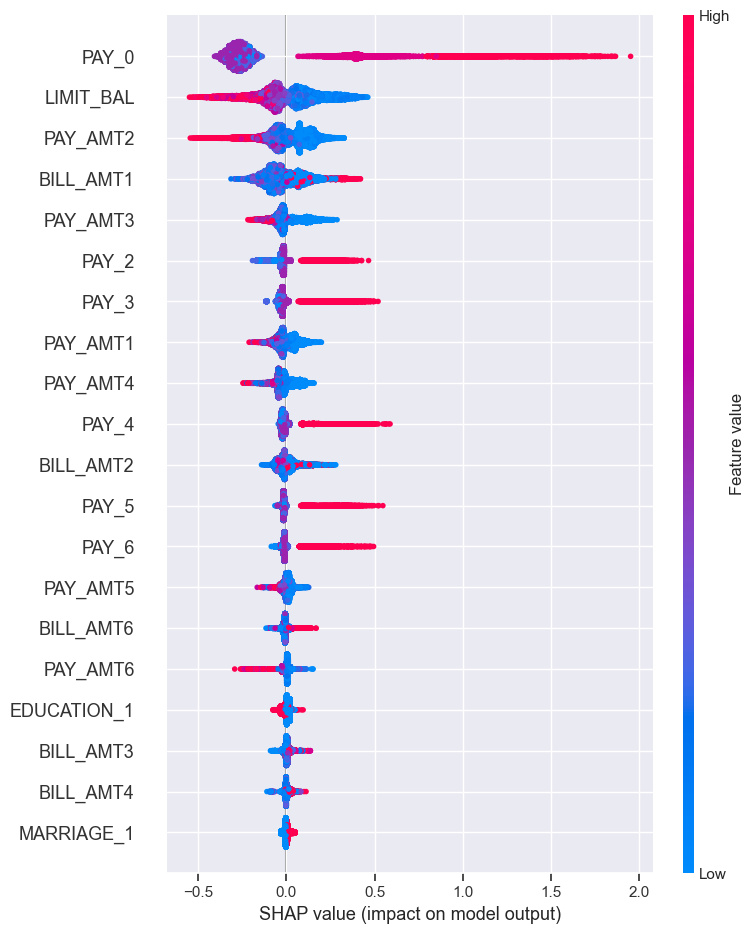

In [58]:
shap.summary_plot(lgbm_shap_values, X_train_enc)

In [59]:
X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=feature_names,
    index=X_test.index,
)

test_lgbm_shap_values = lgbm_explainer.shap_values(X_test_enc)

/Users/aryanjain/miniconda3/envs/cpsc330/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


In [60]:
lgbm_tuned.predict_proba(X_test_enc)[1]

array([0.74058038, 0.25941962])

In [61]:
lgbm_tuned.predict(X_test_enc, raw_score=True)[1]

-1.0489872894312522

In [62]:
lgbm_explainer.expected_value

-0.5594117098974121

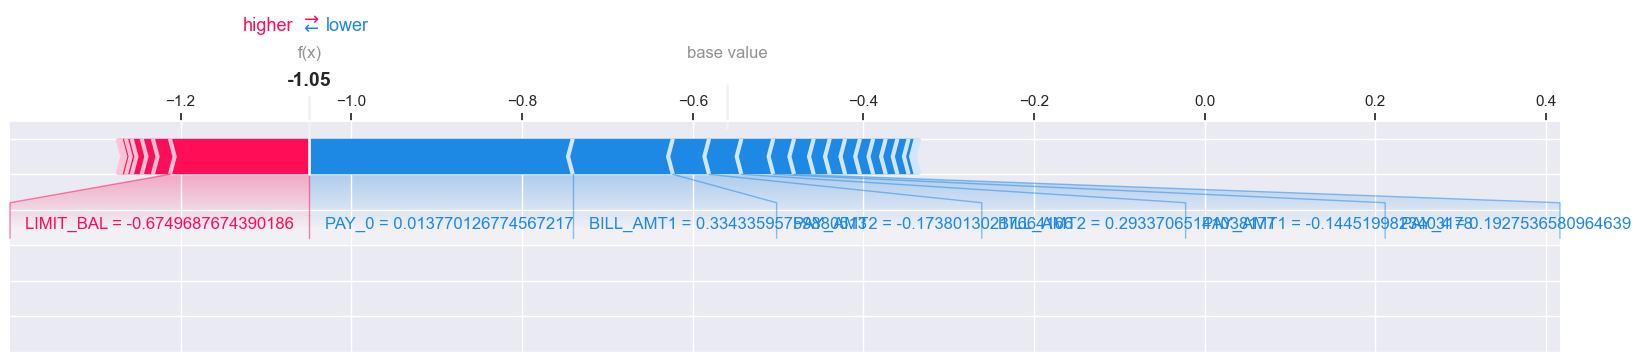

In [63]:
shap.force_plot(
    lgbm_explainer.expected_value,
    test_lgbm_shap_values[1, :],
    X_test_enc.iloc[1, :],
    matplotlib=True,
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [64]:
from sklearn.metrics import f1_score

best_model = random_search_lgbm.best_estimator_
print(
    "Grid Search best model validation score: %0.3f" % (random_search_lgbm.best_score_)
)

predictions = best_model.predict(X_test)
print(
    "Macro-average f1 score on the test set: %0.3f"
    % (f1_score(y_test, predictions, average="macro"))
)

Grid Search best model validation score: 0.707
Macro-average f1 score on the test set: 0.695


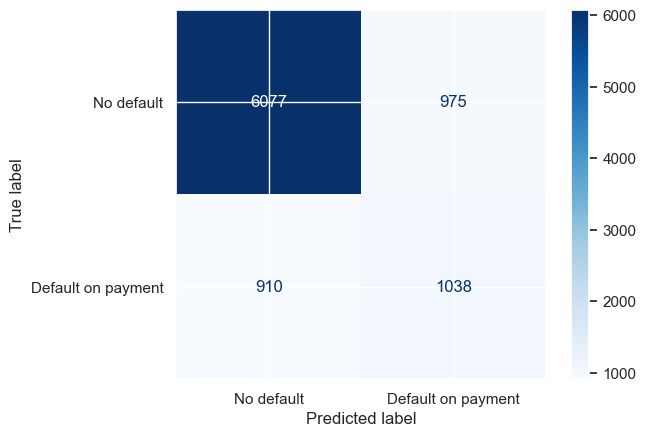

In [65]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    best_model,
    X_test,
    y_test,
    display_labels=["No default", "Default on payment"],
    values_format="d",
    cmap=plt.cm.Blues,
)

In [66]:
print(
    classification_report(
        y_test, predictions, target_names=["No default", "Default on payment"]
    )
)

                    precision    recall  f1-score   support

        No default       0.87      0.86      0.87      7052
Default on payment       0.52      0.53      0.52      1948

          accuracy                           0.79      9000
         macro avg       0.69      0.70      0.69      9000
      weighted avg       0.79      0.79      0.79      9000



In [67]:
y_test_reset = y_test.reset_index(drop=True)
non_default_ind = y_test_reset[y_test_reset == 0].index.tolist()
default_ind = y_test_reset[y_test_reset == 1].index.tolist()

ex_non_default_index = non_default_ind[0]
ex_default_index = default_ind[0]

In [68]:
lgbm_tuned.predict_proba(X_test_enc)[ex_non_default_index]

array([0.697763, 0.302237])

In [69]:
lgbm_tuned.predict(X_test_enc, raw_score=True)[ex_non_default_index]

-0.8366680315908269

In [70]:
lgbm_explainer.expected_value

-0.5594117098974121

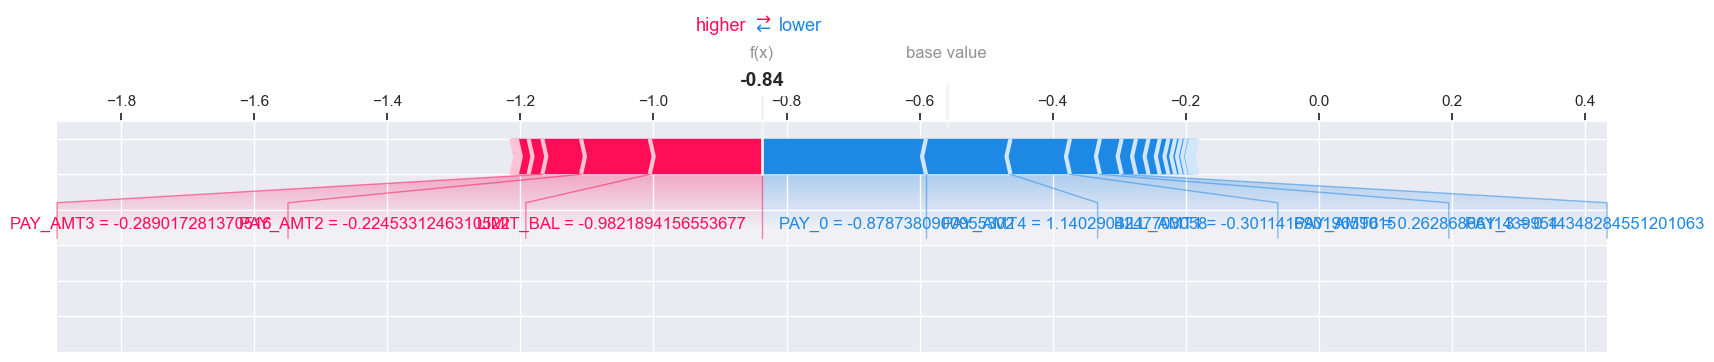

In [71]:
shap.force_plot(
    lgbm_explainer.expected_value,
    test_lgbm_shap_values[ex_non_default_index, :],
    X_test_enc.iloc[ex_non_default_index, :],
    matplotlib=True,
)

In [72]:
lgbm_tuned.predict_proba(X_test_enc)[ex_default_index]

array([0.26909715, 0.73090285])

In [73]:
lgbm_tuned.predict(X_test_enc, raw_score=True)[ex_default_index]

0.9992080664830868

In [74]:
lgbm_explainer.expected_value

-0.5594117098974121

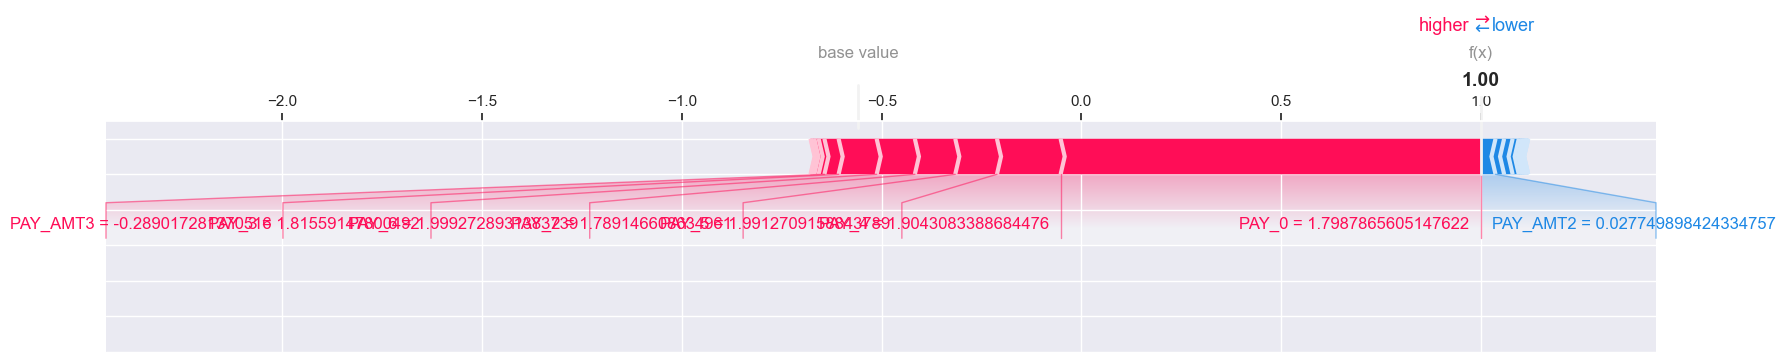

In [75]:
shap.force_plot(
    lgbm_explainer.expected_value,
    test_lgbm_shap_values[ex_default_index, :],
    X_test_enc.iloc[ex_default_index, :],
    matplotlib=True,
)

- The raw model score is 1.00, which is greater than the base value -0.5594 and so the prediction is that the user is likely to default on the credit payment (class 1). 
- Positive values for PAY_* variables seem to push the prediction towards a higher value. <!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [76]:
pd.DataFrame(results).T
summary_df = pd.DataFrame(results).T

In [77]:
comments = {
    "dummy": "Baseline of 0.50 macro-average f1 score.",
    "logreg": "Improvement over the baseline but underfitting.",
    "logreg (tuned)": "Slight improvement but still underfitting.",
    "RBF SVM": "Improvement over tuned logistic regression but slow.",
    "random forest": "Improvement over tuned logistic regression but overfitting.",
    "xgboost": "Best results so far and less overfitting compared to random forest.",
    "lgbm": "Improvement over xgboost and less overfitting.",
    "random forest+ feat_sel": "Feature selection with L1 regularization helps a tiny bit. Selects 29 features.",
    "xgboost+ feat_sel": "Very tiny improvement with L1 feature selection.",
    "lgbm+ feat_sel": "No improvemnt with L1 feature selection.",
    "random forest (tuned)": "Hyperparameter optimization helped! Best results so far.",
    "lgbm (tuned)": "Hyperparameter optimization helped. Best results overall! The scores are very similar to random forest scores but picking this as the best model for its speed.",
}
pd.set_option("display.max_colwidth", 0)
summary_df["comments"] = comments.values()
summary_df

,fit_time,score_time,test_score,train_score,comments
dummy,0.002 (+/- 0.001),0.002 (+/- 0.001),0.499 (+/- 0.005),0.500 (+/- 0.001),Baseline of 0.50 macro-average f1 score.
logreg,0.101 (+/- 0.016),0.005 (+/- 0.002),0.625 (+/- 0.006),0.627 (+/- 0.003),Improvement over the baseline but underfitting.
logreg (tuned),0.033 (+/- 0.003),0.004 (+/- 0.001),0.629 (+/- 0.006),0.630 (+/- 0.003),Slight improvement but still underfitting.
RBF SVM,3.830 (+/- 0.082),1.027 (+/- 0.007),0.675 (+/- 0.008),0.686 (+/- 0.002),Improvement over tuned logistic regression but slow.
random forest,2.767 (+/- 0.278),0.051 (+/- 0.002),0.668 (+/- 0.004),0.999 (+/- 0.000),Improvement over tuned logistic regression but overfitting.
xgboost,0.183 (+/- 0.005),0.006 (+/- 0.000),0.683 (+/- 0.007),0.874 (+/- 0.008),Best results so far and less overfitting compared to random forest.
lgbm,0.431 (+/- 0.013),0.009 (+/- 0.001),0.691 (+/- 0.011),0.772 (+/- 0.004),Improvement over xgboost and less overfitting.
random forest+ feat_sel,3.285 (+/- 0.181),0.051 (+/- 0.002),0.670 (+/- 0.007),0.999 (+/- 0.000),Feature selection with L1 regularization helps a tiny bit. Selects 29 features.
xgboost+ feat_sel,0.917 (+/- 0.377),0.006 (+/- 0.000),0.684 (+/- 0.011),0.872 (+/- 0.005),Very tiny improvement with L1 feature selection.
lgbm+ feat_sel,0.804 (+/- 0.347),0.009 (+/- 0.001),0.690 (+/- 0.008),0.772 (+/- 0.003),No improvemnt with L1 feature selection.


#### Concluding remarks

All our models beat the baseline. Our best model was LightGBM classifier with tuned hyperparameters. It achieved cross-validation macro-average f1 score of 0.707. The scores do not seem to overfit much; the gap between mean train score (0.719) and mean cross-validation score (0.707) is not big. These scores are very similar to the tuned random forest. But random forest seems to overfit. Also, it's much slower than LightGBM. So picked LightGBM model as our final model.  

We observed the macro-average f1 score of 0.695 using this model on the held out test set, which is in line with mean cross-validation macro-average f1-score (0.707). So there doesn't seem to be severe optimization bias here.

We observed that L1 feature selection helped a tiny bit for random forests. But we did not observe any improvement in LightGBM scores with feature selection in the pipeline. In general, we have small number of features in this problem and feature selection doesn't seem crucial. 

Our analysis of feature importances shows that our `PAY_\d{0,2}`, `LIMIT_*`, and `PAY_AMT*` variables seems to be most important features. Although `SEX` feature doesn't show up as one of the most important features, depending upon the context it might be a good idea to drop this feature from our analysis. 

#### Other ideas
    
- Preprocessing and feature engineering     
    - The `BILL_AMT*` and `PAY_AMT*` variables are the bill amount, and amount paid, respectively. We could try making new features by subtracting or otherwise combining these, which would be the amount you paid relative to the amount owed.
    - There are a number of collinear features in the dataset, especially, our `PAY_\d{0,5}` features, which are one of the topmost important features. We could create new features by combining these features.     
    - More data cleaning would probably help. 
    - In my opinion, data cleaning and feature engineering are very important here.
    
- More careful hyperparameter optimization 
    - Because of limited time, we did not carry out extensive hyperparameter optimization. For instance, we didn't carry out hyperparameter optimization with the XGBoost model. It might be worth exploring this area a bit more.  

<br><br>